In [1]:
import numpy as np
import scipy.sparse as sp


In [ ]:
# construcción de una matriz sparse simetrica y definida positiva.

def construir_spd_densa(n,densidad):
    
    A = sp.random_array((n,n),density=densidad, format='csr', dtype=float) 
    tau = 1e-2
    return (A.T @ A) + tau * sp.eye(n, format='csr').toarray()
def nnz_tril(M, tol=1e-14):
    Ml = np.tril(M)
    return int(np.count_nonzero(np.abs(Ml) > tol))
tol = 1e-14
def cholesky_in(A):
    n = A.shape[0]
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i+1):
      
            if j < i and A[i, j] == 0:
                L[i, j] = 0.0  
                continue
            s = 0.0
            for k in range(j):
                s += L[i, k] * L[j, k]
            if i == j:

                L[i, j] = (A[i, i] - s) ** 0.5
            else:
                L[i, j] = (A[i, j] - s) / L[j, j]

    return L
def cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i+1):
            s = 0
            for k in range(j):
                s += L[i][k] * L[j][k]

            if (i == j):
                L[i][j] = (A[i][i] - s) ** 0.5
            else:
                L[i][j] = (1.0 / L[j][j] * (A[i][j] - s))
    return L

In [3]:
B = construir_spd_densa(5,0.5)
B

array([[1.31789569, 0.07872083, 0.85380587, 0.12476937, 0.        ],
       [0.07872083, 0.2039306 , 0.26935018, 0.29152334, 0.07802919],
       [0.85380587, 0.26935018, 1.338741  , 0.42690926, 0.        ],
       [0.12476937, 0.29152334, 0.42690926, 0.46801522, 0.0199212 ],
       [0.        , 0.07802919, 0.        , 0.0199212 , 0.52190271]])

In [4]:

cholb = np.linalg.cholesky(B)
cholb

array([[ 1.14799638,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.06857237,  0.44635012,  0.        ,  0.        ,  0.        ],
       [ 0.74373568,  0.489191  ,  0.7391146 ,  0.        ,  0.        ],
       [ 0.10868446,  0.63642996,  0.04700345,  0.22124757,  0.        ],
       [ 0.        ,  0.17481611, -0.11570393, -0.38824618,  0.57203106]])

In [5]:
chol = cholesky(B)
print(np.linalg.norm( B - chol@chol.T))

2.2214987429400557e-16


In [6]:
cholb = cholesky_in(B)


print(np.linalg.norm( B - cholb@cholb.T))

0.12094137600656298


In [7]:
A = np.array([
    [ 5, -2,  0, -2, -2],
    [-2,  5, -2,  0,  0],
    [ 0, -2,  5, -2,  0],
    [-2,  0, -2,  5, -2],
    [-2,  0,  0, -2,  5]
], dtype=float) 
print(np.linalg.cholesky(A))
cholesky_in(A)


[[ 2.23606798  0.          0.          0.          0.        ]
 [-0.89442719  2.04939015  0.          0.          0.        ]
 [ 0.         -0.97590007  2.01186954  0.          0.        ]
 [-0.89442719 -0.39036003 -1.18345267  1.62697843  0.        ]
 [-0.89442719 -0.39036003 -0.18935243 -1.95237412  0.4472136 ]]


array([[ 2.23606798,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.89442719,  2.04939015,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.97590007,  2.01186954,  0.        ,  0.        ],
       [-0.89442719,  0.        , -0.99410024,  1.7921397 ,  0.        ],
       [-0.89442719,  0.        ,  0.        , -1.5623782 ,  1.32626331]])

In [8]:
B = construir_spd_densa(500,0.5)
cholb = np.linalg.cholesky(B)
print("nnz_tril(B) =", nnz_tril(B))
print("nnz_tril(L) =", nnz_tril(cholb))
print("fill-in abs  =", nnz_tril(cholb, tol) - nnz_tril(B, tol))

nnz_tril(B) = 125250
nnz_tril(L) = 125250
fill-in abs  = 0


In [9]:
for n in [5,10,50,80,100]:
    for d in [0.1,0.2,0.3,0.4, 0.5]:
        print(n,d)
        B = construir_spd_densa(n,d)
        cholb = np.linalg.cholesky(B)
        nnz_tril(cholb, tol) - nnz_tril(B, tol)
        print("nnz_tril(B) =", nnz_tril(B))
        print("nnz_tril(L) =", nnz_tril(cholb))
        print("fill-in abs  =", nnz_tril(cholb, tol) - nnz_tril(B, tol))
        print()

5 0.1
nnz_tril(B) = 5
nnz_tril(L) = 5
fill-in abs  = 0

5 0.2
nnz_tril(B) = 5
nnz_tril(L) = 5
fill-in abs  = 0

5 0.3
nnz_tril(B) = 9
nnz_tril(L) = 9
fill-in abs  = 0

5 0.4
nnz_tril(B) = 10
nnz_tril(L) = 10
fill-in abs  = 0

5 0.5
nnz_tril(B) = 13
nnz_tril(L) = 13
fill-in abs  = 0

10 0.1
nnz_tril(B) = 12
nnz_tril(L) = 12
fill-in abs  = 0

10 0.2
nnz_tril(B) = 26
nnz_tril(L) = 30
fill-in abs  = 4

10 0.3
nnz_tril(B) = 33
nnz_tril(L) = 43
fill-in abs  = 10

10 0.4
nnz_tril(B) = 49
nnz_tril(L) = 54
fill-in abs  = 5

10 0.5
nnz_tril(B) = 55
nnz_tril(L) = 55
fill-in abs  = 0

50 0.1
nnz_tril(B) = 523
nnz_tril(L) = 1127
fill-in abs  = 604

50 0.2
nnz_tril(B) = 1112
nnz_tril(L) = 1274
fill-in abs  = 162

50 0.3
nnz_tril(B) = 1270
nnz_tril(L) = 1274
fill-in abs  = 4

50 0.4
nnz_tril(B) = 1275
nnz_tril(L) = 1275
fill-in abs  = 0

50 0.5
nnz_tril(B) = 1275
nnz_tril(L) = 1275
fill-in abs  = 0

80 0.1
nnz_tril(B) = 1804
nnz_tril(L) = 3151
fill-in abs  = 1347

80 0.2
nnz_tril(B) = 3088
nnz_tril(L

In [23]:
import matplotlib.pyplot as plt
n_list = [5, 10, 50, 80, 100]
d_list = [0.1, 0.2, 0.3, 0.4, 0.5]
fill = np.zeros((len(n_list), len(d_list)), dtype=int)
for i, n in enumerate(n_list):
    for j, d in enumerate(d_list):
        B = construir_spd_densa(n, d)
        L = np.linalg.cholesky(B)
        fill[i, j] = nnz_tril(L, tol) - nnz_tril(B, tol) 


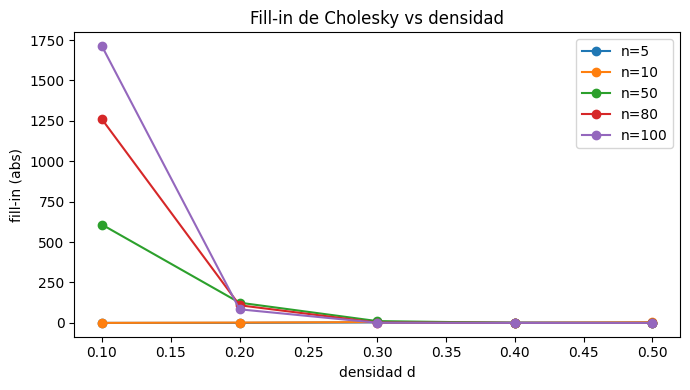

In [25]:
plt.figure(figsize=(7,4))
for i, n in enumerate(n_list):
    plt.plot(d_list, fill[i, :], marker='o', label=f"n={n}")
plt.xlabel('densidad d')
plt.ylabel('fill-in (abs)')
plt.title('Fill-in de Cholesky vs densidad')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# todo graficos de los nnz
# todo verificar con matriz de wikpedia